![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Resolvendo sistemas especiais

## Questão 1: Algoritmo

Uma matriz é dita tridiagonal quando só possui entradas diferentes de zero na diagonal,
e imediatamente acima ou abaixo dela.

Explique porque, ao fazer a eliminação, o algoritmo só precisa operar nas três "diagonais centrais".
Inclusive, dê um exemplo de uma matriz, com muitos zeros, mas para a qual o algoritmo de eliminação
vai ter que acessar e calcular nas entradas correspondentes.

Considere a matriz tridiagonal:

\begin{matrix}
a_1{_1} & a_1{_2} & 0 & 0 & 0 \\
a_2{_1} & a_2{_2} & a_2{_3} & 0 & 0\\
0 & a_3{_2} & a_3{_3} & a_3{_4} & 0\\
0 & 0 & a_4{_3} & a_4{_4} & a_4{_5}\\
0 & 0 & 0 & a_5{_4} & a_5{_5}\\
\end{matrix}

Podemos resolver um sistema linear envolvendo essa matriz aplicando um algoritmo que implemente a eliminição de Gauss. 

Já que todos elementos da primeira coluna depois da segunda linha são zero, na primeira coluna só precisamos eliminar $a_2{_1}$ fazendo $L2 = L2 - (a_2{_1}/a_1{_1})L1$. Teremos então que a segunda linha será: 

\begin{matrix}
 0 & a_2{_2} - (a_2{_1}/a_1{_1}) & 0 & 0 & 0 \\
\end{matrix}

Prosseguindo com a eliminação, procedimento análogo é empregado para eliminar o termo $a_3{_2}$ na segunda coluna, $a_4{_3}$ na terceira e assim em diante. Como para a primeira coluna, nessas operações apenas o elemento da diagonal superior será alterado, já que os demais vão envolver operações com o zero. 

Podemos portanto, para a solução computacional, armazenar apenas os elementos das diagonais e implentar as operações necessárias para se obter uma matriz do tipo:

\begin{matrix}
a_1{_1}' & a_1{_2} & 0 & 0 & 0 \\
0 & a_2{_2}' & a_2{_3} & 0 & 0\\
0 & 0 & a_3{_3}' & a_3{_4} & 0\\
0 & 0 & 0 & a_4{_4}' & a_4{_5}\\
0 & 0 & 0 & 0 & a_5{_5}'\\
\end{matrix}

Para $a_i{_i}' = a_i{_i} - (a_i{_{i-1}}/a_{i-1}{_{i-1}})a_{i-1}{_i}$

Lembrando que as operações efetuadas vão afetar o vetor $b$ da parte não-homogênea do sistema. Não obstante, pode-se encontrar a solução na última linha para o elemento $a_5{_5}'$ e então avançar para iterativamente solucionar as próximas linhas com as respostas das linhas solucionadas.

Agora, escreva a função `tridiag_solve` para resolver sistemas tridiagonais, ou seja,
aqueles cuja matriz de coeficientes é tridiagonal.

Esta função deve realizar o algoritmo de eliminação,
mas, para ter uma boa performance, opere apenas nas entradas das diagonais centrais.

In [2]:
def tridiag_solve(A, b):
    A = np.copy(np.asarray(A, dtype=np.float))
    b = np.copy(np.asarray(b, dtype=np.float))
    n, m = np.shape(A)
    num_of_equations = len(b)
    
    assert m == num_of_equations
    assert n == m, "Matrix must be square"
    
    below_diag, diag, above_diag = A.diagonal(-1), A.diagonal(0), A.diagonal(1)
    ac, bc, cc, dc = map(np.array, (below_diag, diag, above_diag, b))
    for it in range(1, num_of_equations):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        	    
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(num_of_equations-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

Qual o papel do primeiro assert?

Garantir que o número de linhas na matriz A é igual ao número de linhas do vetor b.

In [3]:
A = [[1, 2, 0], [2, 1, -1], [0, 1, -2]]
b = [1,1,1]

x1 = np.linalg.solve(A,b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-14, rtol=1e-14)

In [4]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x1 = np.linalg.solve(A, b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-13, rtol=1e-13)

Se você não tivesse acesso a `np.linalg.solve`, como você poderia testar sua função?
Explique abaixo, e dê um exemplo de teste na caixa seguinte.

Simplesmente implementando outro algoritmo que resolve o sistema e o utilizando no teste. Podemos, por exemplo, usar o próprio Numpy para resolver o sistema Ax = b fazendo o produto matricial da inversa de A por b:

In [5]:
def solve_lin_system(A, b):
    return np.linalg.inv(A).dot(b)

A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)
x1 = solve_lin_system(A, b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-13, rtol=1e-13)

## Questão 2: Tempos

Para cada um dos `ns` dados a seguir, monte um sistema tridiagonal $n \times n$,
e calcule o tempo (usando `time`) para:
1. Criar a matriz A e o vetor b (podem ser aleatórios, podem não ser)
2. Resolver o sistema usando `tridiag_solve`

Armazene os tempos em duas listas, `t_create` e `t_solve`.

Obs: o caixa abaixo pode usar algo como 2G de RAM, por conta das matrizes 8k
(ou até mais, dependendo de **como** você criar as matrizes).
Assim, para testar, diminua a amplitude do logspace, terminando em $2^{10}$ em vez de $2^{13}$.
Se você não conseguir fazer funcionar até $2^{13}$,
reduza o maior valor do `logspace`, mas não reduza demais.

In [6]:
def create_random_tridiag_matrix(n):
    def random_diag(n): return np.random.rand(n)
    
    below = random_diag(n-1)
    main = random_diag(n)
    above = random_diag(n-1)
    
    return np.diag(below, k=-1) + np.diag(main, k=0) + np.diag(above, k=1)

In [21]:
def get_create_and_solve_elapsed_times(ns, create_f, solver):
    t_create = []
    t_solve  = []
    
    for i, n in enumerate(ns):
        t_create_start = time()
        A = create_f(n)
        t_create_end = time()
        t_create.append(t_create_end - t_create_start)

        b = np.random.randn(n)
        t_solve_start = time()
        solver(A, b)
        t_solve_end = time()
        t_solve.append(t_solve_end - t_solve_start)
    
    return t_create, t_solve

ns = np.logspace(4, 13, base=2, num=28, dtype=int)
t_create, t_solve = get_create_and_solve_elapsed_times(ns, create_random_tridiag_matrix, tridiag_solve)

Agora, faça um gráfico destes tempos, em função de $n$.

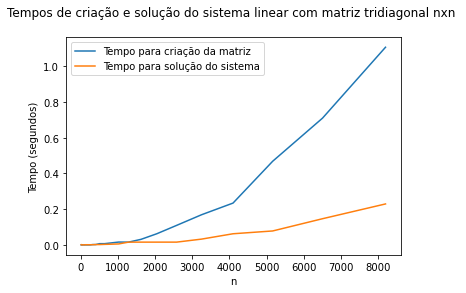

In [22]:
ax = plt.gca()

def plot_elapsed_times(ns, t_create, t_solve, M_type):
    plt.title(f"Tempos de criação e solução do sistema linear com matriz {M_type} nxn \n")
    plt.ylabel("Tempo (segundos)")
    plt.xlabel("n")
    plt.plot(ns, t_create, label="Tempo para criação da matriz")
    plt.plot(ns, t_solve, label="Tempo para solução do sistema")
    plt.legend()
    plt.show()

plot_elapsed_times(ns, t_create, t_solve, M_type="tridiagonal")

In [23]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

In [24]:
for l in ax.lines:
    xs = l.get_xdata()
    assert min(xs) == 2**4
    assert max(xs) <= 2**13

In [25]:
ax = None

Qual etapa demora mais?
Porquê você acha que isso acontece?

A criação da matriz. Como na nossa implementação criar a matriz quadrada envolve assinalar valores aleatórios para as diagonais (principal, acima da principal e abaixo da principal), é de se esperar que a implementação do Numpy tenha uma complexidade ao menos próxima de O(n^2) (pois deve percorrer n linhas n vezes para cada coluna, sem a possibilidade de uma "técnica" para otimizar o processo já que parte dos elementos são números aleatórios). Já a solução do sistema linear deve ser aproximadamente linear, já que ele só lida com um número constante de listas (três, as diagonais) para n linhas.

Agora, faça novos gráficos, para tentar descobrir a taxa de crescimento destes tempos:
se é linear, quadrático, exponencial, ... em função de $n$.

E se são a mesma taxa ou não!

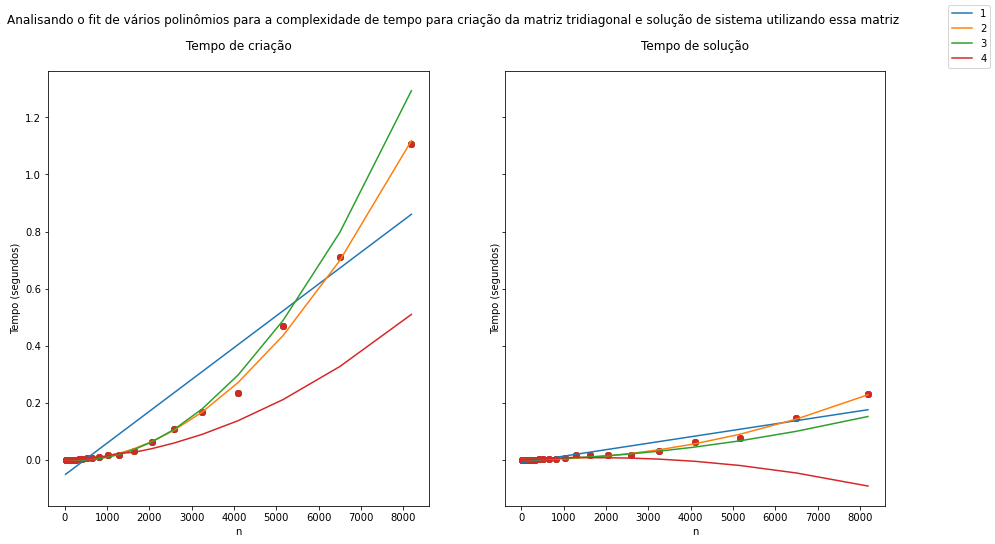

In [26]:
def create_poli(xs, ys, deg):
    coefs = np.polyfit(xs, ys, deg)
    
    def poli(x):
        answer = 0
        for power, coef in enumerate(reversed(coefs)):
            answer += coef*(x**power)
        return np.asarray(answer)
    
    return poli


def plot_poly_fit(t_create, t_solve, M_type):
    fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 8))

    poli_degs = [1, 2, 3, 4]
    for deg in poli_degs:
        t_create_poli = create_poli(ns, t_create, deg)
        t_solve_poli = create_poli(ns, t_solve, deg)


        axs[0].plot(ns, t_create_poli(ns), label=deg)
        axs[0].scatter(ns, t_create)
        axs[0].set_title("Tempo de criação\n")

        axs[1].plot(ns, t_solve_poli(ns), label=deg)
        axs[1].scatter(ns, t_solve)
        axs[1].set_title("Tempo de solução\n")


    for ax in axs:
        ax.set_ylabel("Tempo (segundos)")
        ax.set_xlabel("n")

    fig.suptitle(f"Analisando o fit de vários polinômios para a complexidade de tempo para criação da matriz {M_type} e solução de sistema utilizando essa matriz\n")
    fig.legend(labels=poli_degs)
    
plot_poly_fit(t_create, t_solve, M_type="tridiagonal")

Comente

Podemos ver dos gráficos que a curva do tempo de criação da matriz se ajusta muito bem a um polinômio de segundo grau (representando uma complexidade O(n^2), enquanto que a curva do tempo de solução do sistema com a matriz se ajusta melhor a uma reta (uma complexidade O(n)), confirmando a intuição inicial de que não tem a mesma complexidade.

## Questão 3: Sistemas pentadiagonais

Agora, suponha que a matriz $A$ é pentadiagonal, ou seja, as entradas não-nulas
podem estar até 2 linhas acima ou abaixo da diagonal principal.
Generalize o seu programa para resolver sistemas pentadiagonais.

In [27]:
def create_banded(mat, up=2, low=2, col_wise=True, dtype=None):
    '''De https://github.com/GeoStat-Framework/pentapy'''
    mat = np.asanyarray(mat)
    if mat.ndim != 2:
        raise ValueError("create_banded: matrix has to be 2D")
    if mat.shape[0] != mat.shape[1]:
        raise ValueError("create_banded: matrix has to be n x n")

    size = mat.shape[0]
    mat_flat = np.zeros((5, size), dtype=dtype)
    mat_flat[up, :] = mat.diagonal()

    if col_wise:
        for i in range(up):
            mat_flat[i, (up - i) :] = mat.diagonal(up - i)
        for i in range(low):
            mat_flat[-i - 1, : -(low - i)] = mat.diagonal(-(low - i))
    else:
        for i in range(up):
            mat_flat[i, : -(up - i)] = mat.diagonal(up - i)
        for i in range(low):
            mat_flat[-i - 1, (low - i) :] = mat.diagonal(-(low - i))
    return mat_flat

def pentadiag_solve(A, b):
    '''De https://github.com/GeoStat-Framework/pentapy'''
    A = np.array(A, dtype=np.double)
    A = create_banded(A, col_wise=False, dtype=np.double)
    b = np.array(b, dtype=np.double)

    A_j = A.shape[1]

    result = np.zeros(A_j)

    ps = np.zeros(A_j)  # psi
    si = np.zeros(A_j)  # sigma
    ph = np.zeros(A_j)  # phi
    ro = np.zeros(A_j)  # rho
    we = np.zeros(A_j)  # w


    ps[A_j-1] = A[2, A_j-1]
    si[A_j-1] = A[3, A_j-1] / ps[A_j-1]
    ph[A_j-1] = A[4, A_j-1] / ps[A_j-1]
    we[A_j-1] = b[A_j-1] / ps[A_j-1]

    ro[A_j-2] = A[1, A_j-2]
    ps[A_j-2] = A[2, A_j-2] - si[A_j-1] * ro[A_j-2]
    si[A_j-2] = (A[3, A_j-2] - ph[A_j-1] * ro[A_j-2]) / ps[A_j-2]
    ph[A_j-2] = A[4, A_j-2] / ps[A_j-2]
    we[A_j-2] = (b[A_j-2] - we[A_j-1] * ro[A_j-2]) / ps[A_j-2]

    for i in range(A_j-3, 1, -1):
        ro[i] = A[1, i] - si[i+2] * A[0, i]
        ps[i] = A[2, i] - ph[i+2] * A[0, i] - si[i+1] * ro[i]
        si[i] = (A[3, i] - ph[i+1] * ro[i]) / ps[i]
        ph[i] = A[4, i] / ps[i]
        we[i] = (b[i] - we[i+2] * A[0, i] - we[i+1] * ro[i]) / ps[i]

    ro[1] = A[1, 1] - si[3] * A[0, 1]
    ps[1] = A[2, 1] - ph[3] * A[0, 1] - si[2] * ro[1]
    si[1] = (A[3, 1] - ph[2] * ro[1]) / ps[1]

    ro[0] = A[1, 0] - si[2] * A[0, 0]
    ps[0] = A[2, 0] - ph[2] * A[0, 0] - si[1] * ro[0]

    we[1] = (b[1] - we[3] * A[0, 1] - we[2] * ro[1]) / ps[1]
    we[0] = (b[0] - we[2] * A[0, 0] - we[1] * ro[0]) / ps[0]

    # Foreward substitution
    result[0] = we[0]
    result[1] = we[1] - si[1] * result[0]

    for i in range(2, A_j):
        result[i] = we[i] - si[i] * result[i-1] - ph[i] * result[i-2]

    return np.asarray(result)

In [28]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x2 = tridiag_solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x3, x2, atol=1e-13, rtol=1e-13)

In [29]:
np.random.seed(10)
A = np.diag(range(3,9)) + np.diag([-1,-1,-2,-2], k=2) + np.diag([-2,-2,-1,-1], k=-2)
b = np.random.randn(6)

x1 = np.linalg.solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x1, x3, atol=1e-13, rtol=1e-13)

Repita os cálculos de tempo, para resolver sistemas de dimensão até $2^{13}$.

In [30]:
def create_random_pentadiag_matrix(n):
    def random_diag(n): return np.random.rand(n)
    
    last_below = random_diag(n-2)
    below = random_diag(n-1)
    main = random_diag(n)
    above = random_diag(n-1)
    last_above = random_diag(n-2)
    
    return np.diag(last_below, k=-2) + np.diag(below, k=-1) + np.diag(main, k=0)\
           + np.diag(above, k=1) + np.diag(last_above, k=2)

In [31]:
ns = np.logspace(4, 13, base=2, num=28, dtype=int)
t_create, t_solve = get_create_and_solve_elapsed_times(ns, create_random_pentadiag_matrix, pentadiag_solve)

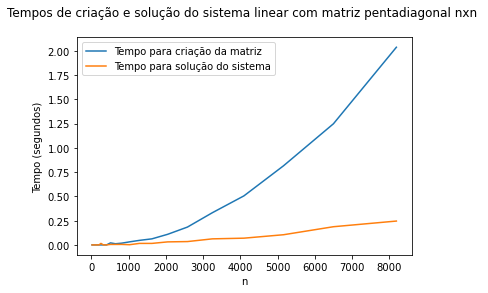

In [32]:
ax = plt.gca()

plot_elapsed_times(ns, t_create, t_solve, M_type="pentadiagonal")

In [33]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

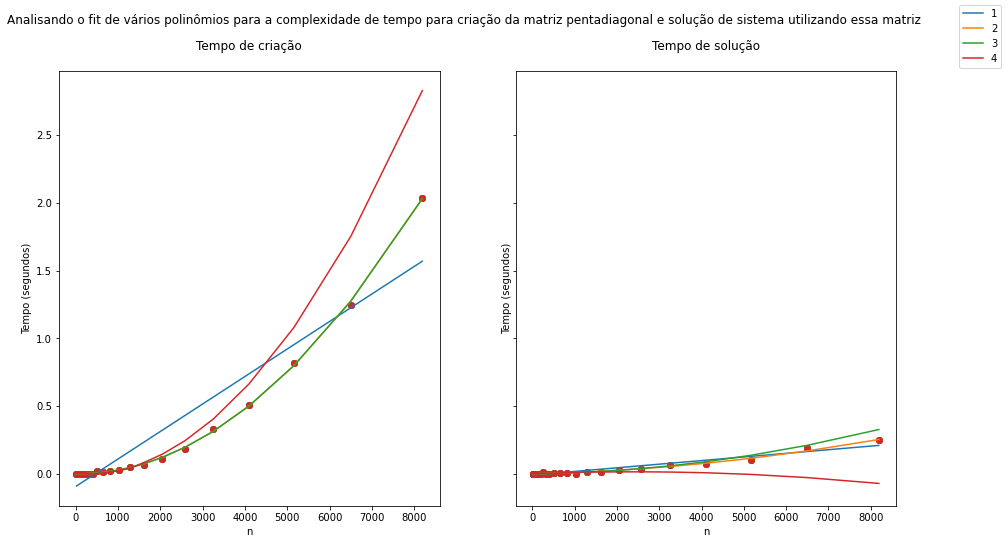

In [34]:
plot_poly_fit(t_create, t_solve, M_type="pentadiagonal")

O que mudou?

Dos gráficos, aparentemente a complexidade dos algoritmos permanece a mesma: quadrática para a criação e linear para solução do sistema. A mudança é que os tempos para criar a matriz e resolver o sistema para um mesmo n são maiores (como é de se esperar) para o caso da matriz pentadiagonal.